In [1]:
# 1. 고령인구비율.xlsx에서 전국 기준 고령인구 비율을 추출한다.

# 3. 전국 GRDP와 전국 경제성장률, 전국 경제활동인구 수, 전국 고령인구 수를 슬라이싱한다.
# 4. 하나의 DataFrame으로 병합한다.
# 5. DataFrame의 각 칼럼들의 인덱스를 맞춘다.
# 6. 요소들을 표준화 한다.
# 7. DataFrame의 nan값을 처리한다.
# 8. (데이터 정규화를 한다..?)
# 9. 
#  전국 GRDP와  전국 경제활동 인구 수를 나눈다.  ==> A
#   전국 경제활동 인구수와 전국 고령인구 수를 나눈다. ==> B
#   전국 경제성장률과 A 에 관한 그래프와  전국 경제 성장률과 B 에 관한 그래프를 만든다.
#  적당?한 그래프를 만든다(최종 두개의 그래프를 비교하고 A와 B 칼럼중 어느 것이 경제 성장에 
#                          더 큰 영향을 주는지 혹은 주지 않는지를 확인한다.)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [5]:
df1 = pd.read_excel('GRDP_시도.xlsx')  # GRDP
df2 = pd.read_excel('경제성장률_시도__20230222224924.xlsx')   # 경제성장률
df3 = pd.read_excel('경제활동인구_시도__20230222225929.xlsx')  # 경제활동인구
df4 = pd.read_excel('고령인구비율_시도_시_군_구__20230222225425.xlsx') # 고령인구비율

In [6]:
df1.to_excel('GRDP_시도.xlsx', index=False)
df2.to_excel('경제성장률_시도__20230222224924.xlsx', index=False)
df3.to_excel('경제활동인구_시도__20230222225929.xlsx', index=False)
df4.to_excel('고령인구비율_시도_시_군_구__20230222225425.xlsx', index=False)

In [7]:
df1.drop(['경제활동별(1)'], axis=1, inplace=True)

In [8]:
df1

,시도별(1),1985,1985.1,1986,1986.1,1987,1987.1,1988,1988.1,1989,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
0,시도별(1),명목,실질,명목,실질,명목,실질,명목,실질,명목,...,명목,실질,명목,실질,명목,실질,명목,실질,명목,실질
1,전국,91625288,278804522,107026220,308977877,124635951,346934339,149134859,388842170,168562344,...,1840348850,1762932983,1902527946,1814075680,1927421209,1854370144,1944644393,1842426414,2076254437,1919305433
2,서울특별시,23118019,77310769,27275885,85661549,32075111,97480930,37559452,107819304,43432475,...,404079600,389584629,423742112,403605888,435927212,414092568,444544909,417638547,471730788,432406018
3,부산광역시,7009992,21773910,7983184,23751051,9294215,26214172,10674301,28703583,11545829,...,87835601,85441974,89979896,86889875,93012134,89105372,91286486,85962709,98651991,87906722
4,대구광역시,3940271,13889560,4684045,15391591,5589706,17380068,6345089,18711134,7072877,...,54832958,52721214,56714479,53964991,58094694,54762237,57725389,53668577,60865535,56026338
5,인천광역시,4227110,13731212,4921002,15072642,5737030,17114977,7062631,19699166,8136135,...,88547364,85791563,88735401,86426825,90040500,87963593,89615465,84907539,97894444,89984023
6,광주광역시,-,-,-,-,2330249,7421376,3068929,8961220,3518507,...,37743917,36384616,39805406,38216077,41519553,39624032,42068384,39530642,43454904,41118247
7,대전광역시,-,-,-,-,-,-,-,-,3930883,...,40537224,38772485,41308348,39135729,43092218,40684092,44393136,41208249,46379776,42368245
8,울산광역시,-,-,-,-,-,-,-,-,-,...,75750070,72968962,73647537,71344390,74654628,72024599,69363394,67136435,77683017,69621279
9,세종특별자치시,-,-,-,-,-,-,-,-,-,...,10632043,10140164,11101861,10423610,11855276,11091040,12703589,11647981,13898917,12489323


In [9]:
df1_column = [ row[0] for row in  ( col.split('.') for col in df1.columns if col >= '2000') if len(row)>=2]
df1_column

['2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021']

In [10]:
df1_sr = df1.loc[ 1, [ col for col in df1.columns if (col >= '2000') & (len(col) > 5) ]]
df1_1 = df1_sr.to_frame()
df1_1 = df1_1.T

In [11]:
df1_1

,시도별(1),2000.1,2001.1,2002.1,2003.1,2004.1,2005.1,2006.1,2007.1,2008.1,...,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1
1,전국,906476368,954266932,1020790393,1058162561,1106646717,1157478093,1220355850,1290847174,1325847750,...,1519358867,1566633412,1615774616,1660844316,1709742565,1762932983,1814075680,1854370144,1842426414,1919305433


In [12]:
df1_copy = df1_1.copy()
df1_copy

,시도별(1),2000.1,2001.1,2002.1,2003.1,2004.1,2005.1,2006.1,2007.1,2008.1,...,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1
1,전국,906476368,954266932,1020790393,1058162561,1106646717,1157478093,1220355850,1290847174,1325847750,...,1519358867,1566633412,1615774616,1660844316,1709742565,1762932983,1814075680,1854370144,1842426414,1919305433


In [13]:
pd.concat([df1_1, df1_copy])

,시도별(1),2000.1,2001.1,2002.1,2003.1,2004.1,2005.1,2006.1,2007.1,2008.1,...,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1
1,전국,906476368,954266932,1020790393,1058162561,1106646717,1157478093,1220355850,1290847174,1325847750,...,1519358867,1566633412,1615774616,1660844316,1709742565,1762932983,1814075680,1854370144,1842426414,1919305433
1,전국,906476368,954266932,1020790393,1058162561,1106646717,1157478093,1220355850,1290847174,1325847750,...,1519358867,1566633412,1615774616,1660844316,1709742565,1762932983,1814075680,1854370144,1842426414,1919305433


In [14]:
df1_1 = df1.loc[1, df1_column]
df1_1

2000     655879090
2001     710997900
2002     786394903
2003     843322858
2004     914889562
2005     958976213
2006    1011291960
2007    1093215642
2008    1159499299
2009    1207708628
2010    1327443926
2011    1393306281
2012    1445391103
2013    1505238577
2014    1566088413
2015    1660844316
2016    1743574724
2017    1840348850
2018    1902527946
2019    1927421209
2020    1944644393
2021    2076254437
Name: 1, dtype: object

In [15]:
type(df1_1)

pandas.core.series.Series

In [16]:
# df1=df1.rename(columns={'2021 p)':'2021', '2021 p).1':'2021.1'})
grdp=df1.iloc[1,29:]
grdp=grdp[2::2]
grdp=pd.DataFrame(grdp)
grdp.columns=['총 생산량']
grdp= grdp.T
grdp.columns = np.asarray(grdp.columns, dtype = float)    #       <------
grdp.columns = np.asarray(grdp.columns, dtype = int)      #       <--------
grdp1 = np.asarray(grdp, dtype = int)

In [17]:
df2=df2.rename(columns={'2021 p)':'2021'})
econo_g_per=df2.iloc[0,15:]
econo_g_per=pd.DataFrame(econo_g_per)
#econo_g_per.index='경제 성장률'
econo_g_per=econo_g_per.T
econo_g_per.index=['경제 성장률']
econo_g_per.columns = np.asarray(econo_g_per.columns, dtype = float)
econo_g_per.columns = np.asarray(econo_g_per.columns, dtype = int)
econo_g_per1 = np.asarray(econo_g_per, dtype = float)

In [18]:
econo_men=df3.iloc[0,8:-1]
econo_men=pd.DataFrame(econo_men)
econo_men.columns=['생산 인구 수']
econo_men=econo_men.T
econo_men.columns= np.asarray(econo_men.columns, dtype = float)
econo_men.columns = np.asarray(econo_men.columns, dtype = int)
econo_men= econo_men* 1000
econo_men1= np.asarray(econo_men, dtype=int)

In [19]:
all_oldmen=df4.iloc[1,5:-2:3]
all_oldmen=pd.DataFrame(all_oldmen)
all_oldmen.columns=['고령 인구 수']
all_oldmen=all_oldmen.T
all_oldmen.columns= np.asarray(all_oldmen.columns, dtype = float)
all_oldmen.columns = np.asarray(all_oldmen.columns, dtype = int)
all_oldmen1=np.asarray(all_oldmen, dtype=int)

In [20]:
all_df=pd.concat([econo_men,all_oldmen,grdp,econo_g_per])
all_df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
생산 인구 수,22151000,22511000,22982000,23043000,23544000,23718000,24024000,24351000,24551000,24582000,...,25781000,26108000,26836000,27153000,27418000,27748000,27895000,28186000,28012000,28310000
고령 인구 수,3355614,3533470,3712626,3904984,4124946,4324524,4556733,4861476,5069273,5267708,...,5980060,6250986,6520607,6775101,6995652,7356106,7650408,8026915,8496077,8851033
총 생산량,655879090,710997900,786394903,843322858,914889562,958976213,1011291960,1093215642,1159499299,1207708628,...,1445391103,1505238577,1566088413,1660844316,1743574724,1840348850,1902527946,1927421209,1944644393,2076254437
경제 성장률,8.8,5.3,7,3.7,4.6,4.6,5.4,5.8,2.7,1,...,2.3,3.1,3.1,2.8,2.9,3.1,2.9,2.2,-0.6,4.2


In [21]:
main_df1= all_oldmen1/econo_men1
main_df1 = pd.DataFrame(main_df1)
main_df1.index=['생산 인구 대비 고령 인구']
main_df1

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
생산 인구 대비 고령 인구,0.151488,0.156966,0.161545,0.169465,0.175202,0.182331,0.189674,0.199642,0.206479,0.214291,...,0.231956,0.239428,0.24298,0.249516,0.255148,0.265104,0.274257,0.284784,0.303301,0.312647


In [22]:
main_df2 = grdp1/econo_men1
main_df2 = pd.DataFrame(main_df2)
main_df2.index=['생산 인구당 생산량']
main_df2

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
생산 인구당 생산량,29.609457,31.584465,34.217862,36.597789,38.858714,40.432423,42.09507,44.894076,47.22819,49.129795,...,56.064199,57.654304,58.357744,61.166144,63.592338,66.323658,68.203189,68.382218,69.421833,73.339966


In [23]:
sum_df = pd.concat([main_df1,main_df2])
sum_df.columns = list(range(2000, 2022))
sum_df.columns = np.asarray(sum_df.columns, dtype=int)
sum_df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
생산 인구 대비 고령 인구,0.151488,0.156966,0.161545,0.169465,0.175202,0.182331,0.189674,0.199642,0.206479,0.214291,...,0.231956,0.239428,0.242980,0.249516,0.255148,0.265104,0.274257,0.284784,0.303301,0.312647
생산 인구당 생산량,29.609457,31.584465,34.217862,36.597789,38.858714,40.432423,42.095070,44.894076,47.228190,49.129795,...,56.064199,57.654304,58.357744,61.166144,63.592338,66.323658,68.203189,68.382218,69.421833,73.339966


In [24]:
final_df=pd.concat([all_df,sum_df])

In [25]:
final_df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
생산 인구 수,22151000,22511000,22982000,23043000,23544000,23718000,24024000,24351000,24551000,24582000,...,25781000,26108000,26836000,27153000,27418000,27748000,27895000,28186000,28012000,28310000
고령 인구 수,3355614,3533470,3712626,3904984,4124946,4324524,4556733,4861476,5069273,5267708,...,5980060,6250986,6520607,6775101,6995652,7356106,7650408,8026915,8496077,8851033
총 생산량,655879090,710997900,786394903,843322858,914889562,958976213,1011291960,1093215642,1159499299,1207708628,...,1445391103,1505238577,1566088413,1660844316,1743574724,1840348850,1902527946,1927421209,1944644393,2076254437
경제 성장률,8.8,5.3,7,3.7,4.6,4.6,5.4,5.8,2.7,1,...,2.3,3.1,3.1,2.8,2.9,3.1,2.9,2.2,-0.6,4.2
생산 인구 대비 고령 인구,0.151488,0.156966,0.161545,0.169465,0.175202,0.182331,0.189674,0.199642,0.206479,0.214291,...,0.231956,0.239428,0.24298,0.249516,0.255148,0.265104,0.274257,0.284784,0.303301,0.312647
생산 인구당 생산량,29.609457,31.584465,34.217862,36.597789,38.858714,40.432423,42.09507,44.894076,47.22819,49.129795,...,56.064199,57.654304,58.357744,61.166144,63.592338,66.323658,68.203189,68.382218,69.421833,73.339966


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


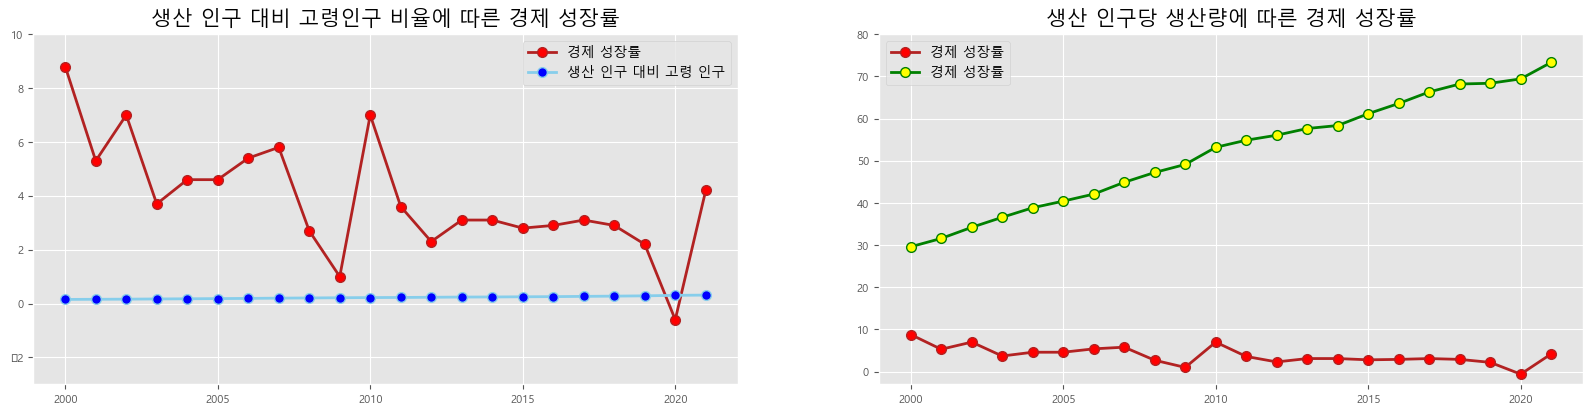

In [41]:
col_years =list(map(int, range(2000,2022)))
final_df1= final_df.loc[['경제 성장률','생산 인구 대비 고령 인구','생산 인구당 생산량'], col_years]

plt.style.use('ggplot')

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

ax1.plot(col_years, final_df1.loc['경제 성장률',:], marker='o', markerfacecolor='red', markersize=7,color='firebrick', linewidth=2, label='경제 성장률')
ax1.plot(col_years, final_df1.loc['생산 인구 대비 고령 인구',:], marker='o', markerfacecolor='blue', markersize=7,color='skyblue', linewidth=2, label='생산 인구 대비 고령 인구')
ax2.plot(col_years, final_df1.loc['경제 성장률',:], marker='o', markerfacecolor='red', markersize=7,color='firebrick', linewidth=2, label='경제 성장률')
ax2.plot(col_years, final_df1.loc['생산 인구당 생산량',:], marker='o', markerfacecolor='yellow', markersize=7,color='green', linewidth=2, label='경제 성장률')

ax1.set_ylim(-3,10)
ax2.set_ylim(-3,80)

ax1.legend(loc='best')
ax2.legend(loc='best')

ax1.set_title('생산 인구 대비 고령인구 비율에 따른 경제 성장률', size = 15)
ax2.set_title('생산 인구당 생산량에 따른 경제 성장률', size = 15)

ax1.tick_params(axis="x", labelsize= 8)
ax1.tick_params(axis="y", labelsize= 8)
ax2.tick_params(axis="x", labelsize= 8)
ax2.tick_params(axis="y", labelsize= 8)

plt.show()                                # 데이터 정규화 하지 않음